# Flora Classifier Code

## Import Usefull Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os

## Setting Parameters

In [15]:
# Path to the dataset containing flower images
base_dir = r"C:\Users\Bhawna B Dhapudkar\Desktop\Ritesh Ai\Ritesh D2\PROJECTS\COMPLETED\DL Model\Flowers_Group"

# Image size and batch size for training
img_size = 224
batch = 64

## Data Augmentation and Loading Datasets

In [18]:
# ---------------- Data Augmentation ---------------- #
# Creating an ImageDataGenerator for training with augmentation techniques
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,   # Normalize pixel values between 0 and 1
    shear_range=0.2,     # Apply random shearing
    zoom_range=0.2,      # Apply random zooming
    horizontal_flip=True,  # Flip images horizontally
    validation_split=0.2  # Split dataset (20% for validation)
)

# Creating an ImageDataGenerator for testing (only rescaling)
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values between 0 and 1
    validation_split=0.2  # Split dataset (20% for validation)
)

# ---------------- Loading Datasets ---------------- #
# Load training dataset from directory
train_datagen = train_datagen.flow_from_directory(
    base_dir, 
    target_size=(img_size, img_size),  # Resize images to 224x224
    subset='training',  
    batch_size=batch
)

# Load validation dataset from directory
test_datagen = test_datagen.flow_from_directory(
    base_dir,  
    target_size=(img_size, img_size),  # Resize images to 224x224
    subset='validation',  
    batch_size=batch
)

Found 2615 images belonging to 4 classes.
Found 650 images belonging to 4 classes.


## CNN Model Creation

In [27]:
# ---------------- CNN Model Creation ---------------- #
# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Downsampling

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # Downsampling

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # Downsampling

# Fourth Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # Downsampling

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Fully connected layer with 512 neurons
model.add(Dense(512))
model.add(Activation('relu'))  # Activation function for non-linearity

# Output layer with softmax activation (5 classes)
model.add(Dense(4, activation="softmax"))  # 4 flower categories

C:\Users\Bhawna B Dhapudkar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilation and Training of the Model

In [30]:
# ---------------- Model Compilation ---------------- #
# Compile the model using Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---------------- Model Training ---------------- #
# Train the model for 20 epochs with validation data
model.fit(train_datagen, epochs=20, validation_data=test_datagen)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3551 - loss: 1.4899

C:\Users\Bhawna B Dhapudkar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.3573 - loss: 1.4838 - val_accuracy: 0.5985 - val_loss: 0.9668
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6334 - loss: 0.8956 - val_accuracy: 0.6508 - val_loss: 0.8694
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6447 - loss: 0.8492 - val_accuracy: 0.6646 - val_loss: 0.8403
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6936 - loss: 0.7776 - val_accuracy: 0.6308 - val_loss: 0.8572
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6734 - loss: 0.7845 - val_accuracy: 0.6723 - val_loss: 0.8105
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7098 - loss: 0.7215 - val_accuracy: 0.6846 - val_loss: 0.7893
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.7352 - loss: 0.6691 - val_accuracy: 0.6985 - val_loss: 0.8045
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7404 - loss: 0.6426 - val_accuracy: 0.6569 - val_loss: 0.8338
E

## Save and Load the Model

In [35]:
# ---------------- Save and Load Model ---------------- #
# Save the trained model to a file
model.save('Flora_Model.h5')

# Load the saved model
from tensorflow.keras.models import load_model
savedModel = load_model('Flora_Model.h5')

# Print the class indices (label mappings)
print(train_datagen.class_indices)

{'daisy': 0, 'rose': 1, 'sunflower': 2, 'tulip': 3}


## Image Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
[[0. 1. 0. 0.]]
Predicted Flower: Rose


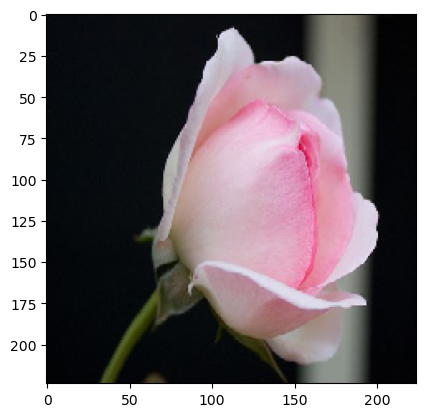

In [38]:
# ---------------- Image Prediction ---------------- #
from keras.preprocessing import image

# Define a list of class labels corresponding to index positions
list_ = ['Daisy', 'Rose', 'Sunflower', 'Tulip']

# Load an image for prediction
test_image = image.load_img(
    r"C:\Users\Bhawna B Dhapudkar\Desktop\Ritesh Ai\Ritesh D2\PROJECTS\COMPLETED\DL Model\Flowers_Group\img.jpg",
    target_size=(224, 224)
)

# Display the image
plt.imshow(test_image)

# Convert the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)  # Expand dimensions to match model input shape

# Predict the class probabilities
result = savedModel.predict(test_image)
print(result)  # Print probability values for each class

# ---------------- Mapping Prediction to Label ---------------- #
# Find the indexof the highest probability
predicted_class = np.argmax(result)

# Print the corresponding class label
print("Predicted Flower:", list_[predicted_class])